# CODE EXAM 1: Nick Usich

## Question 1: Use Closed Form Solution
• This is a one dimension data.
• No need to split the data into training, validation, and test.
• No need to center the data
1) Assuming we are using the function
2) Use Closed-form method to solve for a, b, c.
3) Plot out the scatter plot of the data and your f(x).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from autograd import grad

In [2]:
x = np.genfromtxt('problem_1_data.csv', delimiter=',')
x = x.reshape(-1, 1)
print("X-shape: ", x.shape)

y = np.genfromtxt('problem_1_label.csv', delimiter=',')
y = y.reshape(-1, 1)
print("Y-shape: ", y.shape)

X-shape:  (300, 1)
Y-shape:  (300, 1)


In [3]:
def cfs(x,y):
    # Append bias
    fm = np.hstack((x**2, x, np.ones((x.shape[0],1))))

    # Find closed-form solution
    weights = (np.linalg.inv((fm.T @ fm)) @ fm.T) @ y
    return weights
weights = cfs(x,y)
print("OPTIMAL WEIGHTS: \n", weights)

OPTIMAL WEIGHTS: 
 [[ 1.06623954]
 [-0.58165109]
 [ 4.01338366]]


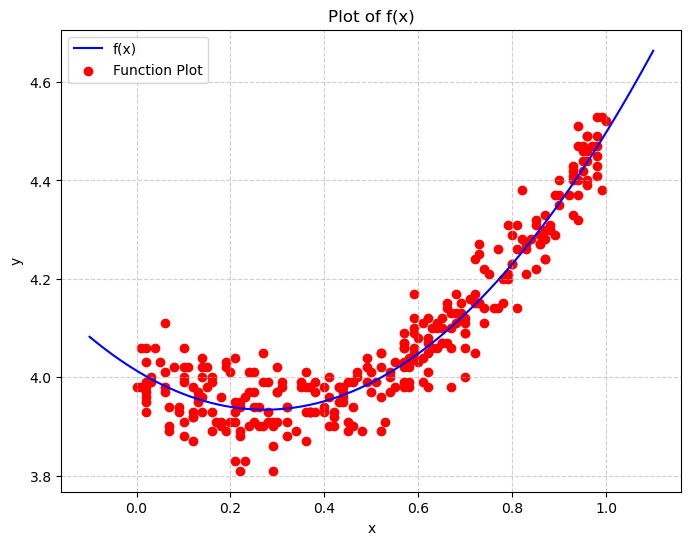

In [4]:
def f(x):
    return (weights[0,0]*(x**2)) + (weights[1,0]*x) + (weights[2,0])

x_values = np.linspace(-0.1, 1.1, 400)
y_values = f(x_values)
x_flat = x.flatten()
y_flat = y.flatten()

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x)', color='b')
plt.scatter(x_flat, y_flat, label="Function Plot", color='r')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x)')
plt.legend()
plt.show()

## Question 2: Use Gradient Descent

1) Split the data into train, validation, test. (Use Sklearn is okay)
2) Center and Scale the data. (Use Sklearn is okay)
3) Use gradient descent to train both linear and 2nd-order polynomial models.
• Show the plot of MSE going down as you step through gradient descent.
• Print out the final MSE for both models on training, validation, and test?
• Which model would you pick?

In [5]:
# Importing data and labels
x = np.genfromtxt('problem_2_data.csv', delimiter=',')
print("X-shape: ", x.shape)

y = np.genfromtxt('problem_2_label.csv', delimiter=',')
y = y.reshape(-1, 1)
print("Y-shape: ", y.shape)

X-shape:  (500, 5)
Y-shape:  (500, 1)


In [6]:
# 1: Scale and Center the data
scaler = pre.StandardScaler().fit(x)
x = scaler.transform(x)
print("x-std: ", x.std())
print("x-mean: ", x.mean())
# 2: Split into train (80%) and remaining (20%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=22)

# 3: Split remaining into val (10%) and test (10%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=22)
y_test = y_test.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

print("\nX-train shape: ", x_train.shape)
print("Y-train shape: ", y_train.shape)

print("\nX-val shape: ", x_val.shape)
print("Y-val shape: ", y_val.shape)

print("\nX-test shape: ", x_test.shape)
print("Y-test shape: ", y_test.shape)

x-std:  1.0
x-mean:  6.9277916736609765e-18

X-train shape:  (400, 5)
Y-train shape:  (400, 1)

X-val shape:  (50, 5)
Y-val shape:  (50, 1)

X-test shape:  (50, 5)
Y-test shape:  (50, 1)


In [7]:
# We already defined the GD function,x and y are already defined so we really just have to make the feature map
# GD function
def poly_gd(x, y, step_size, iterations, degree):
    print("x", x.shape)
    print("y", y.shape)
    u = step_size

    # Transform features into polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    fm = poly.fit_transform(x)
    x = fm

    # Initializing weights (I chose these somewhat randomly)
    w = np.random.randn(fm.shape[1], 1)
    print('w', w.shape)
    
    iters = []
    MSE = []
    
    # Gradient Descent
    for i in range(iterations):

        # Calculating loss
        tloss = 0
        for j in range(x.shape[0]):
            loss = (((w.T @ fm[j, :]) - y[j]) ** 2)
            tloss += (1 / x.shape[0]) * loss

        # Calculating gradient
        tdloss = np.zeros(w.shape)
        for j in range(x.shape[0]):
            dloss = (((w.T @ fm[j, :]) - y[j, :]) * fm[j, :])
            dloss = dloss.reshape(-1, 1)
            tdloss += (2 / x.shape[0]) * dloss
            
        if i%2 == 0:
            MSE.append(tloss)
            iters.append(i)

        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nMSE Loss:\n ", tloss)
    print("\nOptimal Weights:\n ", w)
    return w, iters, MSE, poly


w_polynomial, poly_iters, poly_MSE, poly_transform = poly_gd(x_train, y_train, 0.01, 200, 2)
w_linear, linear_iters, linear_MSE, linear_transform  = poly_gd(x_train, y_train, 0.01, 200, 1)


x (400, 5)
y (400, 1)
w (21, 1)


MSE Loss:
  [0.08777158]

Optimal Weights:
  [[-3.81617365e-01]
 [ 2.99313533e+00]
 [ 9.40928682e-01]
 [-1.64636136e-03]
 [ 1.95171519e+00]
 [ 3.88504511e+00]
 [ 3.24644913e-02]
 [-1.30383917e-02]
 [-6.90710476e-02]
 [-3.99786756e-02]
 [-2.94628966e-02]
 [ 7.00571700e-02]
 [ 8.77696991e-02]
 [ 9.36974075e-03]
 [ 9.04436807e-02]
 [ 8.96576417e-02]
 [ 9.11996339e-02]
 [ 8.11300286e-02]
 [ 5.04147146e-02]
 [-9.20304637e-03]
 [ 5.19839286e-02]]
x (400, 5)
y (400, 1)
w (6, 1)


MSE Loss:
  [0.01351008]

Optimal Weights:
  [[ 0.00615327]
 [ 2.94299836]
 [ 0.96244583]
 [-0.0129249 ]
 [ 1.93829732]
 [ 3.96029455]]


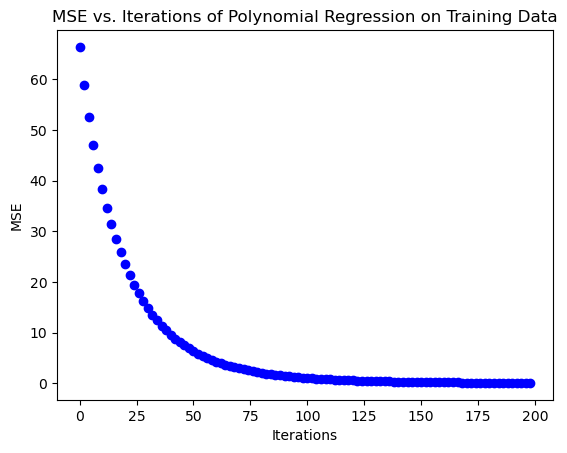

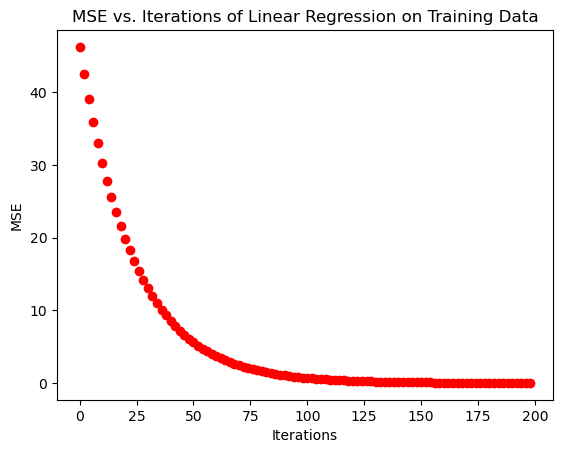

In [8]:
plt.title("MSE vs. Iterations of Polynomial Regression on Training Data")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.scatter(poly_iters, poly_MSE, color='b')
plt.show()

plt.title("MSE vs. Iterations of Linear Regression on Training Data")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.scatter(linear_iters, linear_MSE, color='r')
plt.show()

In [9]:
def eval_model(weights, feature_transformer, x, y, set_name):
    x_poly = feature_transformer.transform(x)
    predictions = x_poly@weights
    mse = np.mean((predictions - y) ** 2)
    print(f"MSE of {set_name}: ", mse)
    return mse

mse_train_poly = eval_model(w_polynomial, poly_transform, x_train, y_train, set_name='polynomial train')
mse_val_poly = eval_model(w_polynomial, poly_transform, x_val, y_val, set_name='polynomial val') 
mse_test_poly = eval_model(w_polynomial, poly_transform, x_test, y_test, set_name='polynomial test')

mse_train_linear = eval_model(w_linear, linear_transform, x_train, y_train, set_name='linear train')
mse_val_linear = eval_model(w_linear, linear_transform, x_val, y_val, set_name='linear val')
mse_test_linear = eval_model(w_linear, linear_transform, x_test, y_test, set_name='linear test')

if (mse_train_poly + mse_val_poly + mse_test_poly)/3 > (mse_train_linear + mse_val_linear + mse_test_linear)/3:
    print("Polynomial model is better than linear model")
else:  
    print("Linear model is better than polynomial model")

MSE of polynomial train:  0.08611684373462199
MSE of polynomial val:  0.11470647493783513
MSE of polynomial test:  0.12498625828155316
MSE of linear train:  0.01305916331140363
MSE of linear val:  0.01834721740861679
MSE of linear test:  0.008887730798044896
Polynomial model is better than linear model


## QUESTION 3:  Solve the minimization problem

(150pts) Load the following files
lunch_wait_time.csv.
This file consists of 200 people recording the amount of time they waited in line until they got to order their lunch.

Use the 200 samples as {x1, x2, ..., x200} in the minimization problem

1) Solve for the closed-form solution for θ.
(Note: that the closed-form solution is when you take the derivative and set it to 0 to solve for θ)
2) Run Gradient Descent to minimize this objective and find θ.
3) Find the population mean, variance, and standard deviation for this dataset.
The population variance is when you use 1/n
Note: Question 3 is the solution to the Maximum Likelihood problem for exponential distribution.

In [10]:
wait_time = np.genfromtxt('lunch_wait_time.csv', delimiter=',')
wait_time = wait_time.reshape(-1, 1)
print(wait_time.shape)

(200, 1)


In [11]:
# Closed form solution
def theta_cfs(x):
    # Find closed-form solution
    theta = x.shape[0]/(np.sum(x))
    return theta
theta = theta_cfs(wait_time)

print(theta)

0.9610764055742432


In [12]:
# GD function, minimizing the loss function
def gd(x, step_size, iterations):
    print("x", x.shape)
    u = step_size

    # Initializing weights
    w = 5

    # Gradient Descent
    for i in range(iterations):
        
        # Calculating loss
        tloss = -(x.shape[0])*np.log(w) + w*np.sum(x)

        # Calculating gradient
        tdloss = (-x.shape[0]/w) + np.sum(x)
        
        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nLoss:\n\t ", tloss)
    print("\nGradient of Loss:\n\t ", tdloss)
    print("\nOptimal Weights:\n\t ", w)

    return w

w = gd(wait_time, 0.0001, 20000)

x (200, 1)


Loss:
	  207.9402733703104

Gradient of Loss:
	  5.400124791776761e-13

Optimal Weights:
	  0.9610764055742457


In [13]:
mu = (1/200) * np.sum(wait_time)
print("Population mean: ", mu)

var = 0 
for i in range(wait_time.shape[0]):
    o = (wait_time[i] - mu)**2
    var += (1/wait_time.shape[0]) * o 
print("Population variance: ", var)

std = var**(1/2)
print("Population standard deviation: ", std)

Population mean:  1.0405
Population variance:  [1.02832975]
Population standard deviation:  [1.01406595]


## QUESTION 4:  Solve the minimization problem
1) Using Gradient descent.
2) Using the closed-form solution.
The 2 solutions should match

In [14]:
A = np.array([[1, 1, 1],
              [4, 2, 1],
              [9, 3, 1],
              [16, 4, 1]])

y = np.array([[2],
              [4],
              [8],
              [14]])

print(A, "\n\n", y)

[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [16  4  1]] 

 [[ 2]
 [ 4]
 [ 8]
 [14]]


In [15]:
# GD function, minimizing the loss function
def gd(x,y, step_size, iterations):
    
    Q = x.T @ x
    z = x.T @ y

    u = step_size

    # Initializing weights
    w = np.random.randn(3, 1)

    # Gradient Descent
    for i in range(iterations):
        
        # Calculating loss
        tloss = (A@w - y)**2

        # Calculating gradient
        tdloss = 2*Q@w - 2*z
        
        # Updating weights based on gradient
        w = w - u * (tdloss)

    # Printing Results
    print("\n\nLoss:\n\t ", tloss)
    print("\nGradient of Loss:\n\t ", tdloss)
    print("\nOptimal Weights:\n\t ", w)

    return w

w = gd(A,y, 0.001, 200000)



Loss:
	  [[3.42113690e-26]
 [7.73162573e-27]
 [1.50230671e-26]
 [6.67691870e-27]]

Gradient of Loss:
	  [[ 0.00000000e+00]
 [ 2.84217094e-14]
 [-1.06581410e-13]]

Optimal Weights:
	  [[ 1.]
 [-1.]
 [ 2.]]


In [16]:
# Closed form solution
Q = A.T @ A
z = A.T @ y
w = np.linalg.inv(Q) @ z
print(w)

[[ 1.]
 [-1.]
 [ 2.]]
